# Irreversible Copolymer Equation Parameter Estimation

This notebook performs parameter estimation for an irreversible copolymerization model with a single reaction experiment.

**Hypothesis:**
- Parameter identifiability will vary with feed fraction conditions
- Low feed fractions will be more challenging for accurate parameter estimation

The analysis workflow includes:
1. Generating experimental data
2. Parameter optimization
3. Profile likelihood analysis
4. MCMC sampling
5. Visualization and comparison

In [12]:
# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import seaborn as sns

# PyPESTO and related libraries
import pypesto
import amici

# PolyPESTO imports
from polypesto.models.CRP2 import IrreversibleCPE as Model
from polypesto.core.experiments import load_all_experiments, load_experiment
from polypesto.utils.plot import plot_all_measurements

# Import the new visualization modules
from polypesto.visualization import (
    plot_waterfall,
    plot_optimization_scatter,
    plot_profiles,
    plot_parameter_traces,
    plot_confidence_intervals,
    visualize_parameter_estimation
)

# Import analysis modules
from polypesto.analysis import (
    compare_parameters_across_conditions,
    create_parameter_comparison_df
)

# Import the experiment configuration
import experiments.irreversible_cpe.single_rxn.exp as exp

# Enable autoreload for easier development
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Generate Experiment Data

We start by generating the experimental data for different feed fraction conditions.

In [13]:
# Option to regenerate experiment data
regenerate_data = False

if regenerate_data:
    print("Generating experiment data...")
    param_groups, petab_paths = exp.generate_experiment_data()
    print(f"Generated data for {len(petab_paths)} feed fraction conditions")
else:
    print("Using existing experiment data")

# Verify data is available
if not os.path.exists(exp.DATA_DIR):
    print("Data directory not found. Generating experiment data...")
    param_groups, petab_paths = exp.generate_experiment_data()
else:
    print(f"Data directory found at: {exp.DATA_DIR}")

Using existing experiment data
Data directory found at: /PolyPESTO/experiments/irreversible_cpe/single_rxn/data


## 2. Run Parameter Estimation

Now we'll run the parameter estimation process for all experiments. This includes:
- Optimization: Finding the best-fit parameters
- Profiling: Creating likelihood profiles for each parameter
- Sampling: MCMC sampling of the posterior distribution

In [14]:
# Define parameter estimation configuration
# You can customize these settings as needed
pe_config = {
    "optimize": {
        "n_starts": 20,  # Reduced for notebook demonstration
        "method": "Nelder-Mead",
    },
    "profile": {"method": "Nelder-Mead"},
    "sample": {"n_samples": 2000, "n_chains": 3},  # Reduced for notebook demonstration
}

# Option to run parameter estimation
run_estimation = False

if run_estimation:
    print("Running parameter estimation with config:")
    print(pe_config)
    results = exp.run_parameter_estimation(pe_config)
    print("Parameter estimation completed")
else:
    print("Skipping parameter estimation (use existing results)")

Skipping parameter estimation (use existing results)


## 3. Load and Analyze Results

Now we'll load the existing results and analyze them.

In [15]:
# Load all experiments
experiments = load_all_experiments(exp.DATA_DIR, Model.name)

if not experiments:
    print(
        "No experiments found. Please run data generation and parameter estimation first."
    )
else:
    print(f"Loaded {len(experiments)} experiments:")
    for exp_name, exp_data in experiments.items():
        print(f"  {exp_name}: {len(exp_data.param_ids)} parameter sets")

Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualizat

Loaded experiment: fA0_0.25


Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualizat

Loaded experiment: fA0_0.50


Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualizat

Loaded experiment: fA0_0.10


Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.


Loaded experiment: fA0_0.75
Loaded 4 experiments:
  fA0_0.25: 25 parameter sets
  fA0_0.50: 25 parameter sets
  fA0_0.10: 25 parameter sets
  fA0_0.75: 25 parameter sets


### 3.1 Select a Specific Experiment

We'll focus on one feed fraction condition for detailed analysis.

In [16]:
# Select feed fraction to analyze
feed_fraction = 0.5
exp_dir = os.path.join(exp.DATA_DIR, f"fA0_{feed_fraction:.2f}")

print(f"Loading experiment from: {exp_dir}")
experiment = load_experiment(exp_dir, Model.name)

# Print basic information
print(f"Loaded experiment with {len(experiment.param_ids)} parameter sets")
print(f"Parameter set IDs: {experiment.param_ids[:5]}... (showing first 5)")

Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.


Loading experiment from: /PolyPESTO/experiments/irreversible_cpe/single_rxn/data/fA0_0.50


Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.
Visualization table not available. Skipping.


Loaded experiment with 25 parameter sets
Parameter set IDs: ['p_000', 'p_001', 'p_002', 'p_003', 'p_004']... (showing first 5)


### 3.2 Analyze a Specific Parameter Set

Now we'll select one parameter set and analyze its results in detail.

{}


/PolyPESTO/polypesto/visualization/plots.py:567: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  if not plt.figlegend().get_texts():


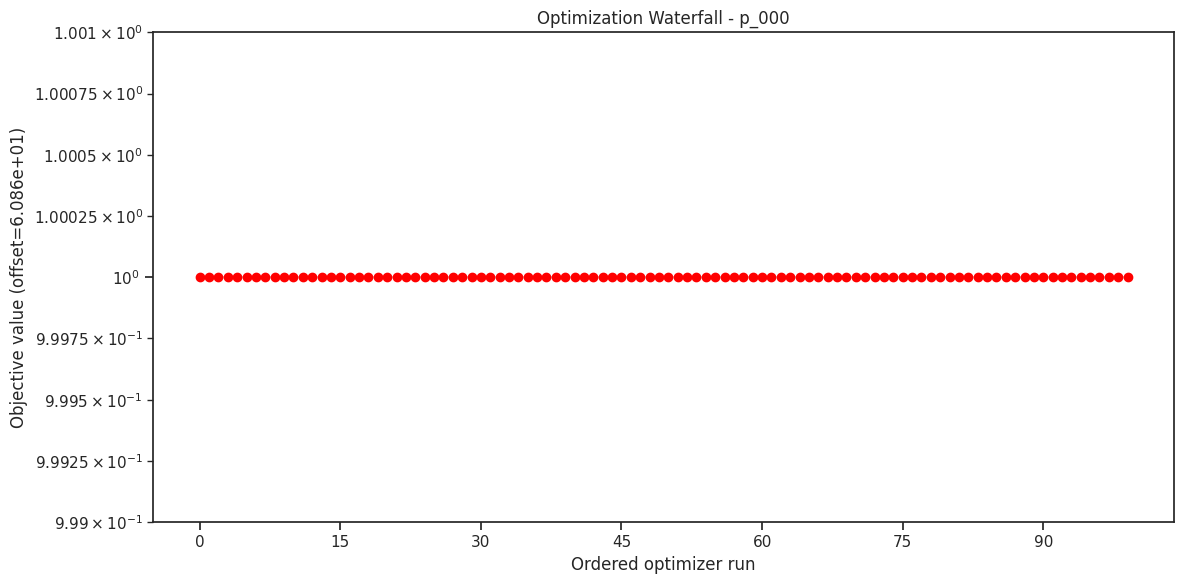

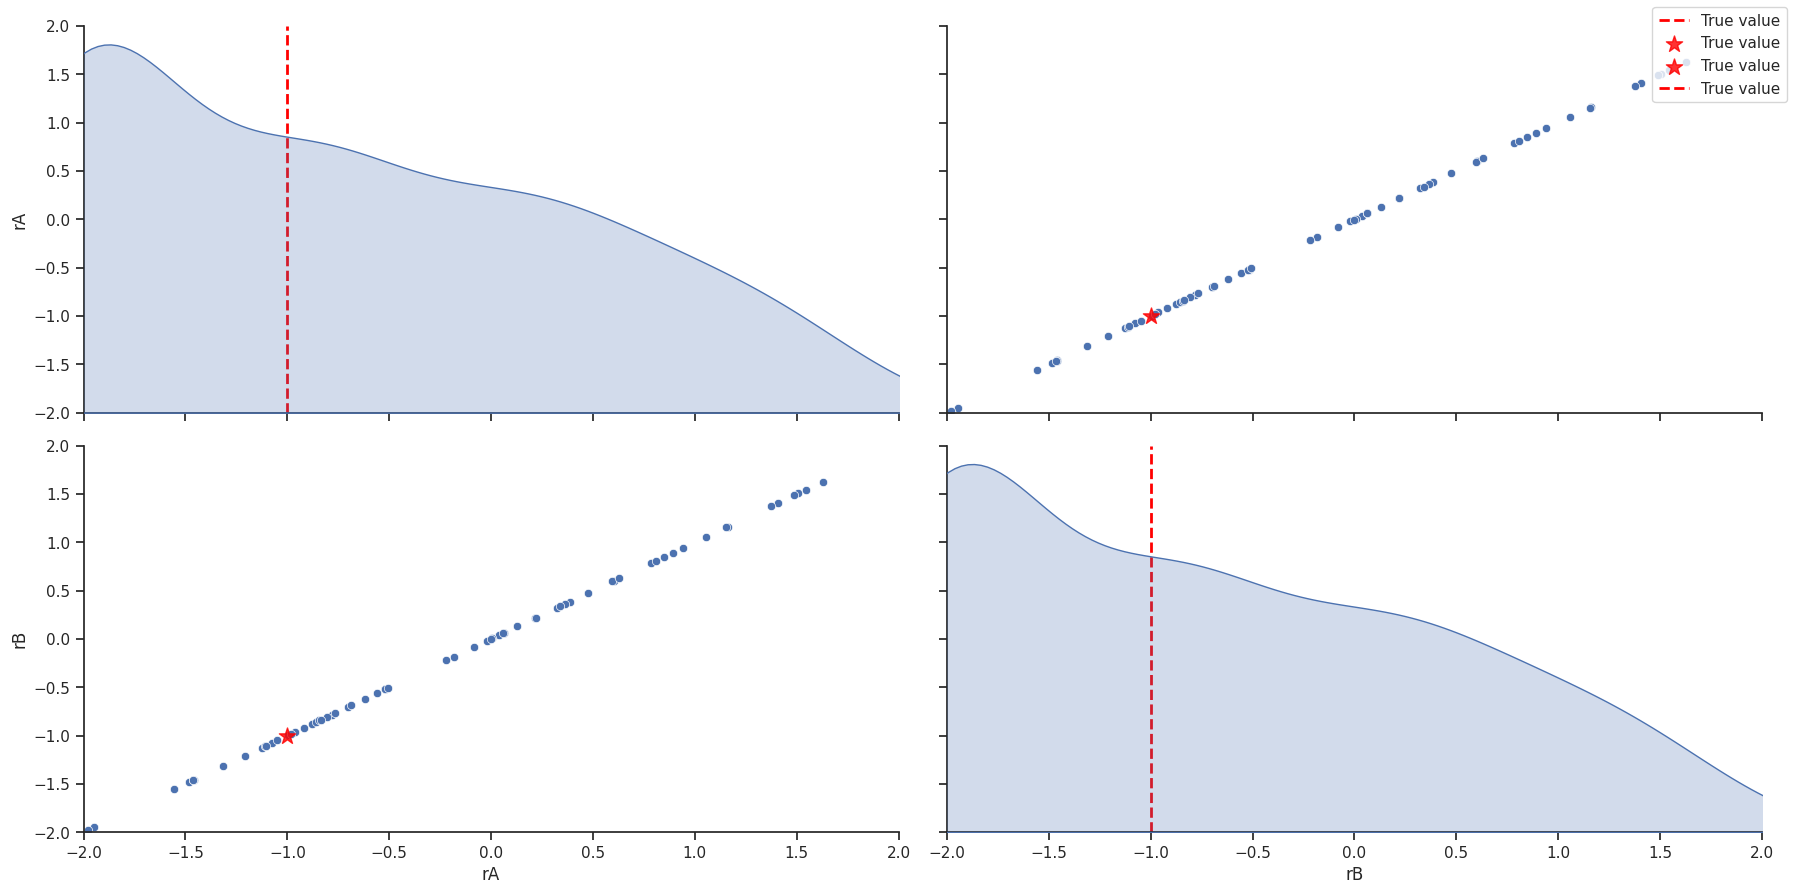

<Figure size 1800x600 with 0 Axes>

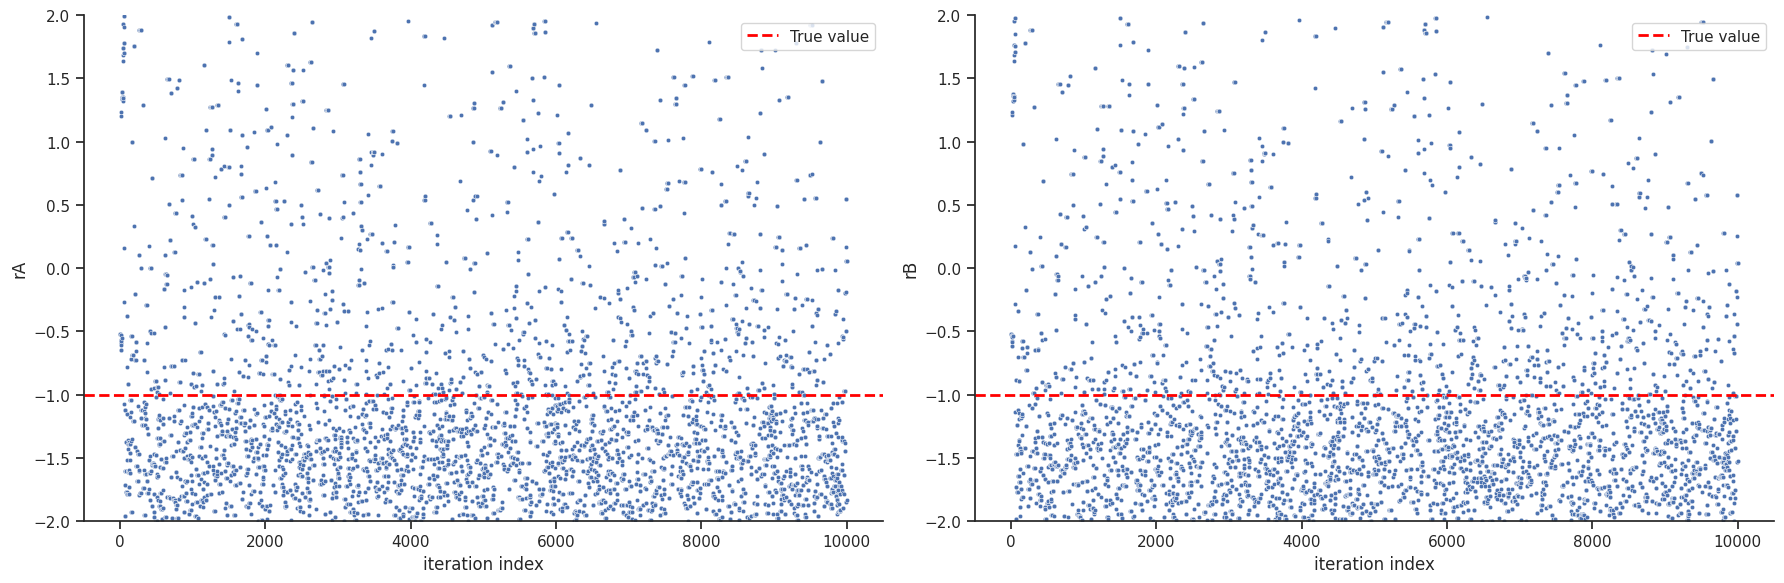

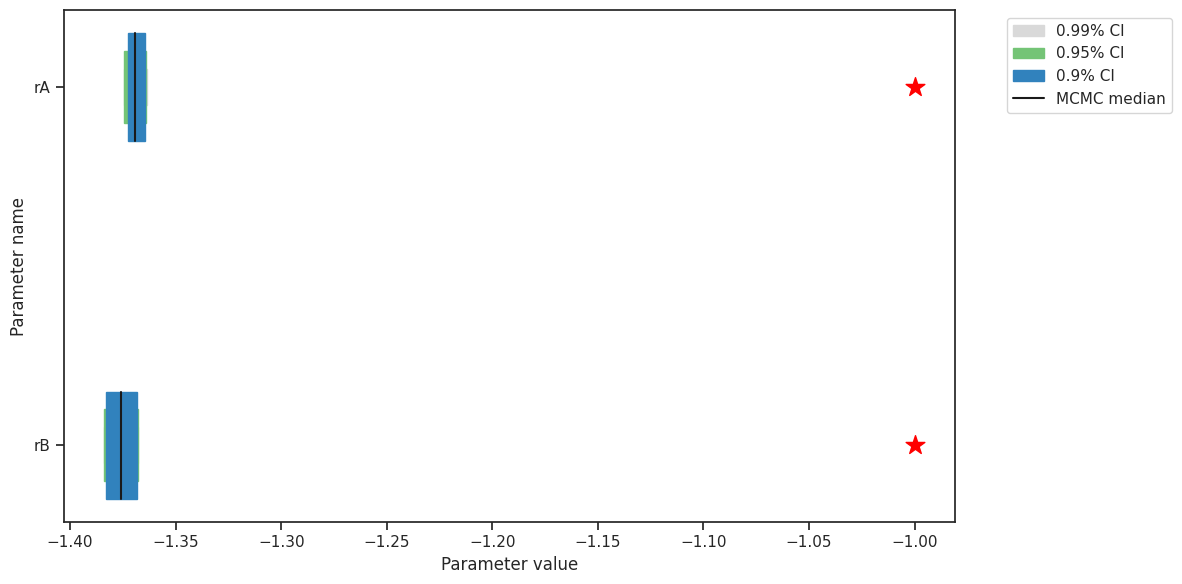

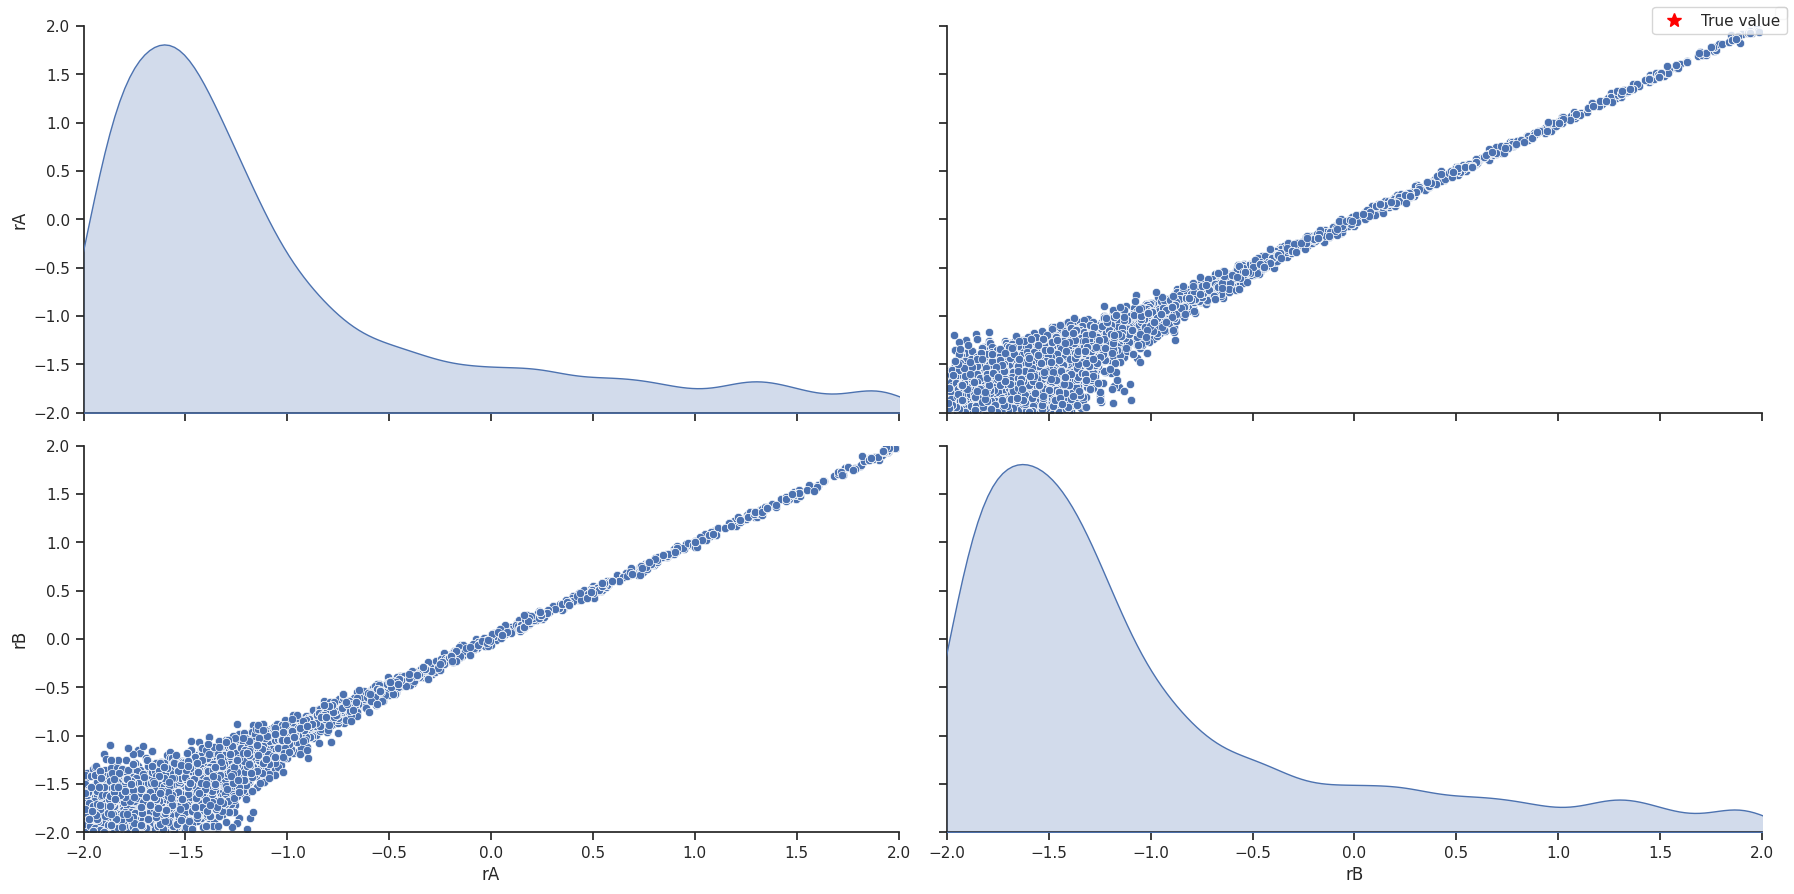

In [17]:
# Create all parameter estimation visualizations using the new refactored API
estimation_plots = visualize_parameter_estimation(
    result=result,
    true_params=true_params,
    plots=[
        "waterfall",
        "scatter",
        "profiles",
        "traces",
        "intervals",
        "sampling_scatter",
    ],
    figsize=(12, 6),
)

# Display waterfall plot (optimization convergence)
if "waterfall" in estimation_plots:
    fig, ax = estimation_plots["waterfall"]
    ax.set_title(f"Optimization Waterfall - {param_id}")
    plt.show()

# Display parameter profiles
if "profiles" in estimation_plots:
    fig, ax = estimation_plots["profiles"]
    if hasattr(fig, "suptitle"):
        fig.suptitle(f"Parameter Profiles with True Values - {param_id}")
    plt.show()

# Display parameter scatter plot from optimization
if "scatter" in estimation_plots:
    fig, grid = estimation_plots["scatter"]
    if hasattr(fig, "suptitle"):
        fig.suptitle(f"Parameter Scatter Plot - {param_id}")
    plt.show()

# Display MCMC parameter traces
if "traces" in estimation_plots:
    fig, ax = estimation_plots["traces"]
    if hasattr(fig, "suptitle"):
        fig.suptitle(f"Parameter Traces - {param_id}")
    plt.show()

# Display credible intervals
if "intervals" in estimation_plots:
    fig, ax = estimation_plots["intervals"]
    ax.set_title(f"Parameter Credible Intervals - {param_id}")
    plt.show()

# Display MCMC sampling scatter plot
if "sampling_scatter" in estimation_plots:
    fig, grid = estimation_plots["sampling_scatter"]
    if hasattr(fig, "suptitle"):
        fig.suptitle(f"MCMC Parameter Scatter Plot - {param_id}")
    plt.show()

## 4. Visualize Parameter Estimation Results

Now we'll create visualizations of parameter estimation results using our visualization utilities.

In [18]:
# Create all parameter estimation visualizations at once
estimation_plots = viz.visualize_parameter_estimation(
    result=result,
    true_params=true_params,
    plots=[
        "waterfall",
        "scatter",
        "profiles",
        "traces",
        "intervals",
        "sampling_scatter",
    ],
    figsize=(12, 6),
)

# Display waterfall plot (optimization convergence)
if "waterfall" in estimation_plots:
    fig, ax = estimation_plots["waterfall"]
    ax.set_title(f"Optimization Waterfall - {param_id}")
    plt.show()

# Display parameter profiles
if "profiles" in estimation_plots:
    fig, ax = estimation_plots["profiles"]
    fig.suptitle(f"Parameter Profiles with True Values - {param_id}")
    plt.show()

# Display parameter scatter plot from optimization
if "scatter" in estimation_plots:
    fig, grid = estimation_plots["scatter"]
    fig.suptitle(f"Parameter Optimization Scatter Plot")
    plt.show()

AttributeError: module 'polypesto.utils.visualization' has no attribute 'visualize_parameter_estimation'

# Compare parameters across conditions using the new refactored API
comparison_df, figures = compare_parameters_across_conditions(
    data_dir=exp.DATA_DIR, 
    model_name=Model.name, 
    param_id="p_000",
    figsize=(12, 8)
)

# Display the dataframe
if not comparison_df.empty:
    display(comparison_df)
    
    # Display correlation heatmap
    if 'correlation_heatmap' in figures:
        fig, ax = figures['correlation_heatmap']
        plt.show()
        
    # Display error boxplot
    if 'error_boxplot' in figures:
        fig, ax = figures['error_boxplot']
        plt.show()
        
    # Display objective barplot
    if 'objective_barplot' in figures:
        fig, ax = figures['objective_barplot']
        plt.show()
        
    # Display true vs estimated parameter values
    if 'true_vs_estimated' in figures:
        fig, axes = figures['true_vs_estimated']
        plt.tight_layout()
        plt.show()
else:
    print("No comparison data available across conditions.")

In [ ]:
# Display parameter traces
if 'traces' in estimation_plots:
    fig, ax = estimation_plots['traces']
    fig.suptitle(f"Parameter Traces with True Values")
    plt.show()

# Display parameter credible intervals
if 'intervals' in estimation_plots:
    fig, ax = estimation_plots['intervals']
    ax.set_title(f"Parameter Credible Intervals")
    plt.show()

# Display parameter sampling scatter
if 'sampling_scatter' in estimation_plots:
    fig, grid = estimation_plots['sampling_scatter']
    fig.suptitle(f"Parameter Sampling Scatter Plot")
    plt.show()

## 6. Visualize Data Fit

Now let's visualize how well the model fits the experimental data.

In [ ]:
def visualize_model_fit(importer, problem, result):
    """Visualize how well the model fits the experimental data."""
    # Get measurements
    measurements = importer.petab_problem.get_measurement_df()
    
    # Setup model and solver
    model = importer.model
    solver = importer.solver
    best_params = result.optimize_result.x
    
    # Setup simulation
    edatas = []
    for condition_id in importer.petab_problem.get_condition_df().index:
        condition = importer.petab_problem.get_condition_df().loc[condition_id].to_dict()
        edatas.append(amici.amici.ExpData(
            model=model,
            condition_df=pd.DataFrame(condition, index=[0])
        ))
    
    # Simulate
    best_rdatas = amici.runAmiciSimulation(model, solver, problem.get_x_nominal(), edatas)
    
    # Plot measurements with best fit
    fig, axes = plt.subplots(1, len(edatas), figsize=(12, 5))
    if len(edatas) == 1:
        axes = [axes]
    
    # Extract measurements and predictions for each condition
    for i, (edata, rdata) in enumerate(zip(edatas, best_rdatas)):
        # Get condition ID
        condition_id = list(importer.petab_problem.get_condition_df().index)[i]
        
        # Filter measurements for this condition
        condition_meas = measurements[measurements['simulationConditionId'] == condition_id]
        
        # Get unique observables
        observables = condition_meas['observableId'].unique()
        
        # Plot each observable
        for obs_id in observables:
            obs_meas = condition_meas[condition_meas['observableId'] == obs_id]
            
            # Find observable index
            obs_index = list(model.getObservableIds()).index(obs_id)
            
            # Extract time points and measurements
            t = obs_meas['time'].values
            y = obs_meas['measurement'].values
            
            # Plot measurements
            axes[i].plot(t, y, 'o', label=f'{obs_id} (Data)')
            
            # Plot model prediction
            sim_t = rdata['t']
            sim_y = rdata['y'][:, obs_index]
            axes[i].plot(sim_t, sim_y, '-', label=f'{obs_id} (Model)')
        
        axes[i].set_title(f"Condition {condition_id}")
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Measurement')
        axes[i].legend()
    
    plt.tight_layout()
    return fig, axes

# Visualize model fit to data
try:
    fig, axes = visualize_model_fit(importer, problem, result)
    plt.show()
except Exception as e:
    print(f"Could not create data fit plots: {e}")

## 7. Compare Results Across Feed Fractions

Now we'll compare parameter estimation results across different feed fraction conditions.

In [ ]:
# Compare parameters across conditions
comparison_df, figures = viz.compare_parameters_across_conditions(
    data_dir=exp.DATA_DIR, 
    model_name=Model.name, 
    param_id="p_000",
    figsize=(12, 8)
)

# Display the dataframe
if not comparison_df.empty:
    display(comparison_df.head())
    
    # Show all figures
    for name, (fig, ax) in figures.items():
        plt.figure(fig.number)
        plt.show()
else:
    print("No comparison data available")